<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-2-Regression-1/blob/master/Jef_Ntungila_DS_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [0]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



##Fit a model and forecast avocado sales through March 25, 2020

In [303]:
avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [0]:
avocado['Date'] = pd.to_datetime(avocado['Date'])


In [0]:
avocado = avocado.rename(columns={'Date': 'ds', 'Total Volume': 'y'})

In [306]:
from fbprophet import Prophet
m = Prophet()
m.fit(avocado) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [307]:
future = m.make_future_dataframe(periods=365*2)
future.tail()

,ds
894,2020-03-20
895,2020-03-21
896,2020-03-22
897,2020-03-23
898,2020-03-24


In [308]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
894,2020-03-20,1.074771e+08,1.041849e+08,1.299204e+08,1.055073e+08,1.094241e+08,8.440861e+06,8.440861e+06,8.440861e+06,8.440861e+06,8.440861e+06,8.440861e+06,0.0,0.0,0.0,1.159180e+08
895,2020-03-21,1.074891e+08,1.020298e+08,1.290222e+08,1.055160e+08,1.094397e+08,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,0.0,0.0,0.0,1.156984e+08
896,2020-03-22,1.075012e+08,1.023871e+08,1.285202e+08,1.055250e+08,1.094554e+08,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,0.0,0.0,0.0,1.153503e+08
897,2020-03-23,1.075132e+08,1.018704e+08,1.271408e+08,1.055341e+08,1.094711e+08,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,0.0,0.0,0.0,1.148836e+08
898,2020-03-24,1.075252e+08,1.007562e+08,1.279638e+08,1.055433e+08,1.094868e+08,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,0.0,0.0,0.0,1.143115e+08


##Plot the forecast

In [0]:
import matplotlib as plt

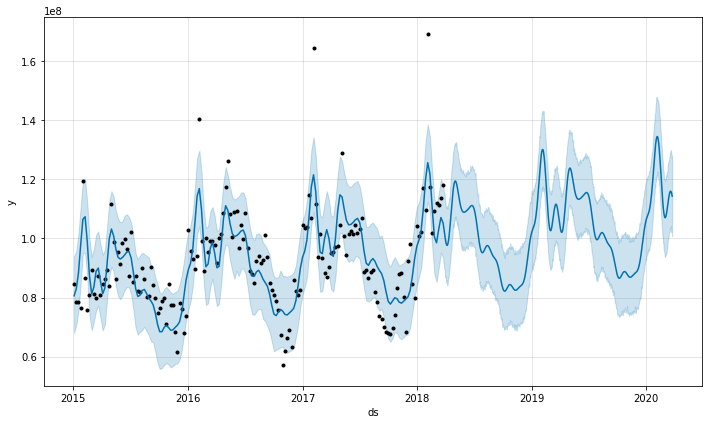

In [310]:
fig1 = m.plot(forecast)


##Plot the forecast components

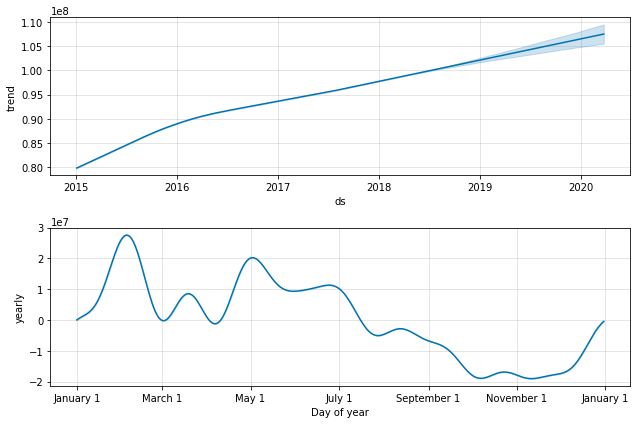

In [311]:
fig2 = m.plot_components(forecast)

##Do time series cross-validation, with these parameters: horizon='90 days', period='45 days', initial='730 days'

In [312]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', 
                         horizon='90 days', period='45 days') 
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-02-19,1.074419e+08,9.547550e+07,1.185460e+08,93821369,2017-02-13
1,2017-02-26,9.893204e+07,8.730930e+07,1.101654e+08,101447375,2017-02-13
2,2017-03-05,9.916261e+07,8.704985e+07,1.107651e+08,93528247,2017-02-13
3,2017-03-12,1.051747e+08,9.389371e+07,1.163434e+08,88180047,2017-02-13
4,2017-03-19,1.088062e+08,9.706528e+07,1.196223e+08,86991403,2017-02-13


##Plot the cross-validation Mean Absolute Percentage Error: metric='mape'

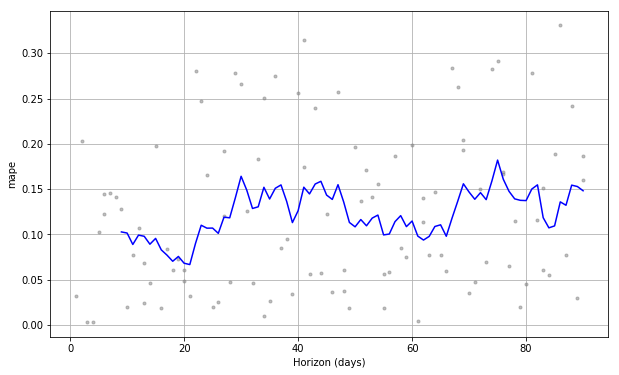

In [313]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [0]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

##Begin with baselines for regression. Calculate the mean absolute error and  R2  score for a mean baseline. (You can use the whole dataset, or a test set, either way is okay here!)

In [315]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


In [0]:
rent['Mean Baseline'] = rent['price'].mean()

In [317]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=rent['price'], 
                    y_pred=rent['Mean Baseline'])

1055.7857771080928

In [318]:
from sklearn.metrics import r2_score
r2_score(y_true=rent['price'], 
                    y_pred=rent['Mean Baseline'])

0.0

##Use scikit-learn to fit a Linear Regression model on the train data

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

##Choose any two features.

In [0]:
X = rent[['bedrooms','bathrooms']]
y = rent['price']

In [0]:
features = ['bedrooms','bathrooms']

target = 'price'

X = rent[features]
y = rent[target]

##Apply the model to predict rent prices for the test data.

In [323]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X)

##Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test

In [0]:
train = rent.query('month <= 5')
test  = rent.query('month == 6')
X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]



In [326]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_test)


##Get regression metrics MAE and  R2  for the test data.

In [328]:
mean_absolute_error(y_test, y_pred)

754.0733041489015

In [329]:
r2_score(y_test, y_pred)

0.4613584851907725

##Get the model's coefficients and intercept.

In [330]:
w0 = model.intercept_
w1 = model.coef_[0]

print(w0, w1)

994.3062975058142 420.50971680242264
